# Chapter: Fault Detection & Diagnosis via Unsupervised Artificial Neural Networks Modeling


# Topic: Dimensionality reduction using Autoencoder

In [1]:
# import required packages
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow
tensorflow.random.set_seed(2)

plt.rcParams.update({'font.size': 14})
np.random.seed(1)

In [2]:
# read data
X_train = pd.read_csv('NOC_varyingFeedFlow_outputs.csv', header=None).values
X_train = X_train[:,1:] # first column contains timestamps

In [3]:
# split data into fitting and validation datasets
from sklearn.model_selection import train_test_split
X_fit, X_val, _, _ = train_test_split(X_train, X_train, test_size=0.2, random_state=10)

In [4]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_fit_scaled = scaler.fit_transform(X_fit)
X_val_scaled = scaler.transform(X_val)
X_train_scaled = scaler.transform(X_train)

In [5]:
# define and compile model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_fit_scaled.shape[1],)) # input layer
encoded = Dense(1, activation='relu')(input_layer) # encoder layer
decoded = Dense(X_fit_scaled.shape[1], activation='linear')(encoded) # decoder layer

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Print model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 1)                 47        
                                                                 
 dense_1 (Dense)             (None, 46)                92        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10)
history = autoencoder.fit(X_fit_scaled, X_fit_scaled, epochs=300, batch_size=256, validation_data=(X_val_scaled, X_val_scaled), callbacks=es)

Epoch 1/300
32/32 [==============================] - 0s 4ms/step - loss: 0.9338 - val_loss: 0.9345
Epoch 2/300
32/32 [==============================] - ETA: 0s - loss: 1.010 - 0s 2ms/step - loss: 0.9091 - val_loss: 0.9248
Epoch 3/300
32/32 [==============================] - 0s 1ms/step - loss: 0.8940 - val_loss: 0.9003
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.8577 - val_loss: 0.8483
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.7951 - val_loss: 0.7753
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.7209 - val_loss: 0.6989
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6484 - val_loss: 0.6275
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5821 - val_loss: 0.5637
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5237 - val_loss: 0.5087
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4744 - va

32/32 [==============================] - 0s 1ms/step - loss: 0.1566 - val_loss: 0.1556
Epoch 82/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1562 - val_loss: 0.1550
Epoch 83/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1559 - val_loss: 0.1546
Epoch 84/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1556 - val_loss: 0.1543
Epoch 85/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1553 - val_loss: 0.1540
Epoch 86/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1550 - val_loss: 0.1537
Epoch 87/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1548 - val_loss: 0.1534
Epoch 88/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1545 - val_loss: 0.1532
Epoch 89/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1543 - val_loss: 0.1529
Epoch 90/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1541 - val_loss: 0.1527
Epoch 91/300


32/32 [==============================] - 0s 1ms/step - loss: 0.1510 - val_loss: 0.1493
Epoch 162/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1493
Epoch 163/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1493
Epoch 164/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1493
Epoch 165/300
32/32 [==============================] - 0s 1ms/step - loss: 0.1510 - val_loss: 0.1493
Epoch 166/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1493
Epoch 167/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1493
Epoch 168/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1493
Epoch 169/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1493
Epoch 170/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1493
Epoc

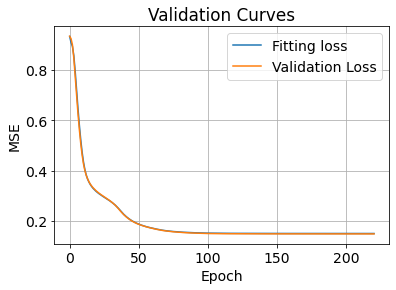

In [10]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='Fitting loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

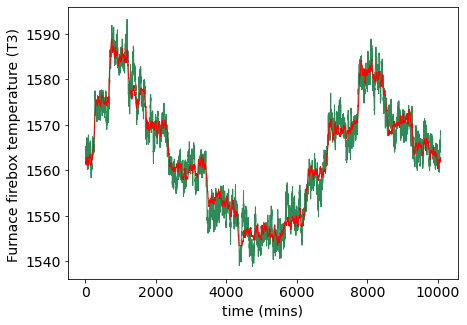

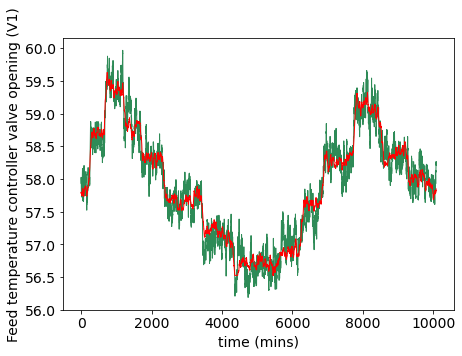

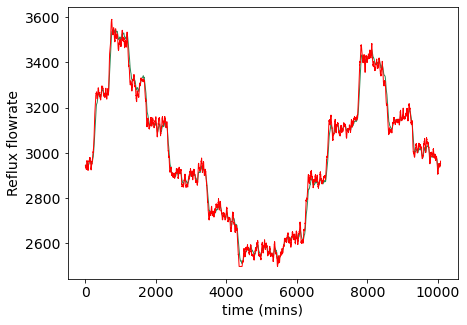

In [8]:
# predict for overall training dataset
X_train_scaled_pred = autoencoder.predict(X_train_scaled)
X_train_pred = scaler.inverse_transform(X_train_scaled_pred)

# compare via plots
plt.figure(figsize=[7,5])
var = 7
plt.plot(X_train[:,var],'seagreen', linewidth=1)
plt.plot(X_train_pred[:,var],'red', linewidth=1)
plt.xlabel('time (mins)')
plt.ylabel('Furnace firebox temperature (T3) ')

plt.figure(figsize=[7,5])
var = 21
plt.plot(X_train[:,var],'seagreen', linewidth=1)
plt.plot(X_train_pred[:,var],'red', linewidth=1)
plt.xlabel('time (mins)')
plt.ylabel('Feed temperature controller valve opening (V1)')

plt.figure(figsize=[7,5])
var = 38
plt.plot(X_train[:,var],'seagreen', linewidth=1)
plt.plot(X_train_pred[:,var],'red', linewidth=1)
plt.xlabel('time (mins)')
plt.ylabel('Reflux flowrate')

plt.show()

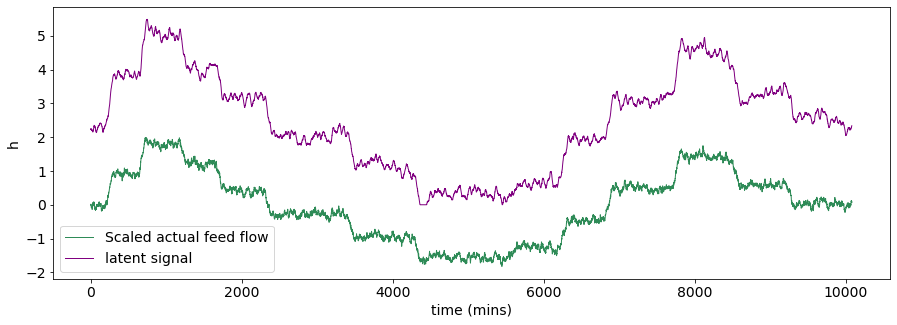

In [9]:
# predict latents
h_train = encoder.predict(X_train_scaled)

# plot
plt.figure(figsize=[15,5])
plt.plot(X_train_scaled[:,0],'seagreen', linewidth=1, label='Scaled actual feed flow')
plt.plot(h_train, 'purple', linewidth=1, label='latent signal')
plt.xlabel('time (mins)'), plt.ylabel('h')
plt.legend()
plt.show()